In [291]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [292]:
# opening the datasets
df_med = pd.read_csv('data/msk-redefining-cancer-treatment/training_variants')
df_text = pd.read_csv('data/msk-redefining-cancer-treatment/training_text',sep='\|\|', engine='python', names=['ID','Text'], skiprows=1)


In [293]:
# taking a look at the first rows
df_med.head(5)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [294]:
df_med.nunique()

ID           3321
Gene          264
Variation    2996
Class           9
dtype: int64

In [295]:
#gene = df_med['Gene'].value_counts().index

#df_med['Gene'] = df_med['Gene'].apply(lambda x: 'Other' if mask_gene[x] else x)
#df_med.dropna(subset=['Gene'],inplace=True)
mask_gene = df_med['Gene'].value_counts().values>10
gene_keep = df_med['Gene'].value_counts().index[mask_gene]
df_med = df_med[df_med['Gene'].isin(gene_keep)]

<Axes: ylabel='Class'>

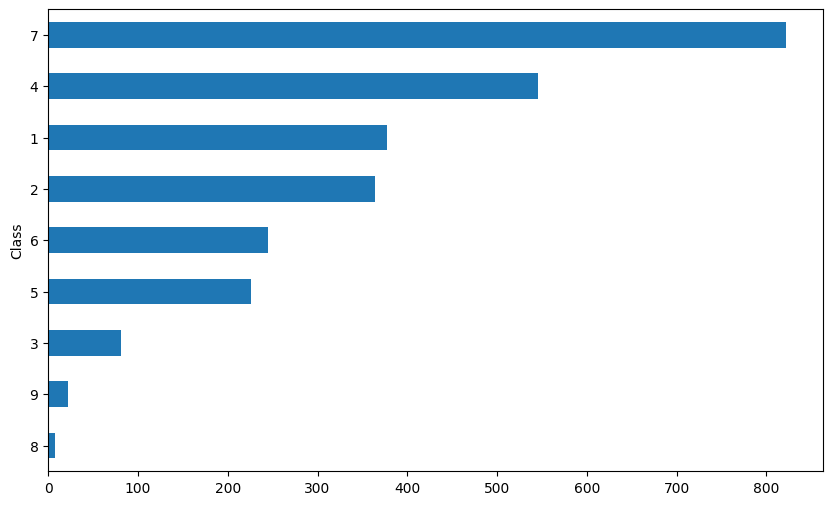

In [296]:
df_med['Class'].value_counts().sort_values().plot(kind='barh',figsize=(10,6))

In [ ]:
# eliminate all the classes with less than 300 counts
df_med = df_med[df_med['Class'].isin([1,2,4,6,7])]



In [298]:
df_text.shape

(3321, 2)

In [299]:
df_text.head(5)

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [300]:
# get the total number of words in each text
df_text['word_count'] = df_text['Text'].apply(lambda x: len(str(x).split()))
#df_text['text_len'] = df_text['Text'].str.len()#.plot(kind='hist',,figsize=(10,6),color='skyblue')

<Axes: xlabel='word_count', ylabel='Count'>

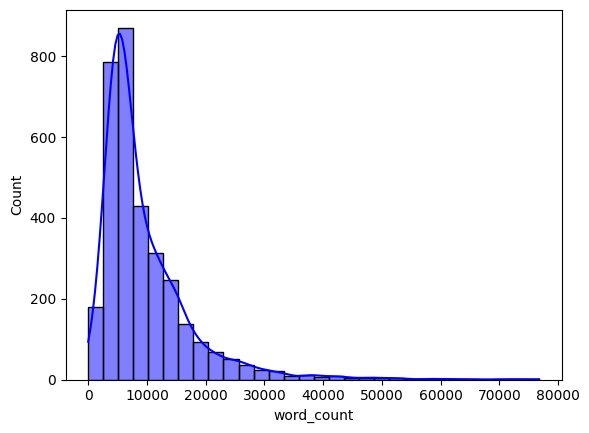

In [301]:
# seaborn histogram
sns.histplot(df_text['word_count'], kde=True, 
             bins=30, color = 'blue')

In [302]:
# remove the rows with text length less than 1000 and more than 20000
df_text = df_text[(df_text['word_count'] > 1000) & (df_text['word_count'] < 20000)]

In [303]:
# truncate the text to 1000 words
df_text['Text'] = df_text['Text'].apply(lambda x: ' '.join(x.split()[-200:-1]) if isinstance(x,str) else str(x))



In [304]:
# filter the text by length less than 100000
#df_text = df_text[df_text['text_len']<100000]

In [305]:
#df_text['text_len'].plot(kind='hist',figsize=(10,6),color='skyblue')

In [306]:
df_text.shape

(3008, 3)

In [307]:
# remove stopwords and punctuation from the text
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
#nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /home/wagner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/wagner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/wagner/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/wagner/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [308]:
# function to remove stopwords and punctuation
def remove_stopwords_punctuation(text):
    # remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word.lower() not in stop_words])
    return text

In [309]:
# function to lemmatize the text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    text = ' '.join([lemmatizer.lemmatize(word, pos='v') for word in word_tokens])
    return text

In [310]:
# function to stem the text
def stem_text(text):
    stemmer = nltk.PorterStemmer()
    word_tokens = word_tokenize(text)
    text = ' '.join([stemmer.stem(word) for word in word_tokens])
    return text

In [311]:
# apply the functions to the text
df_text['Text'] = df_text['Text'].apply(lambda x: remove_stopwords_punctuation(x))


In [312]:
df_text['Text'] = df_text['Text'].apply(lambda x: lemmatize_text(x))

In [313]:
df_text['Text'] = df_text['Text'].apply(lambda x: stem_text(x))

In [314]:
df_text

,ID,Text,word_count
0,0,like result effect 40kb delet express neighbor...,6089
1,1,report earlier ccbl mutat small cohort taiwane...,5756
2,2,report earlier ccbl mutat small cohort taiwane...,5756
3,3,y371h mutat stop codon opposit allel strongli ...,5572
4,4,andor cble2 bind give select advantag tumor ce...,6202
...,...,...,...
3316,3316,express level aml1 protein posttranscript mech...,11028
3317,3317,collabor aml1d171n evi1 vivo result show power...,6068
3318,3318,amlm2 ins218q22q21q22 runx1runx1t1 61 amlm2 in...,5122
3319,3319,therefor collabor oncogen runx1 would readili ...,4885


In [315]:
# in df_med, obtain the number of words in genes
df_med['Gene_len'] = df_med['Gene'].apply(lambda x: len(str(x).split()))
# in df_med, obtain the number of words in variation
df_med['Variation_len'] = df_med['Variation'].apply(lambda x: len(str(x).split()))

<Axes: xlabel='Gene_len', ylabel='Count'>

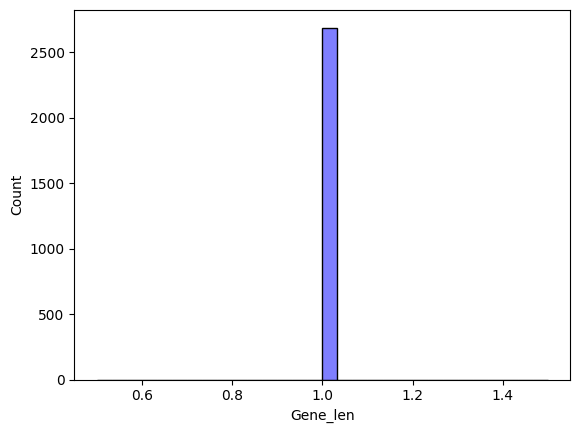

In [316]:
sns.histplot(df_med['Gene_len'], kde=True,
             bins=30, color = 'blue')

<Axes: xlabel='Variation_len', ylabel='Count'>

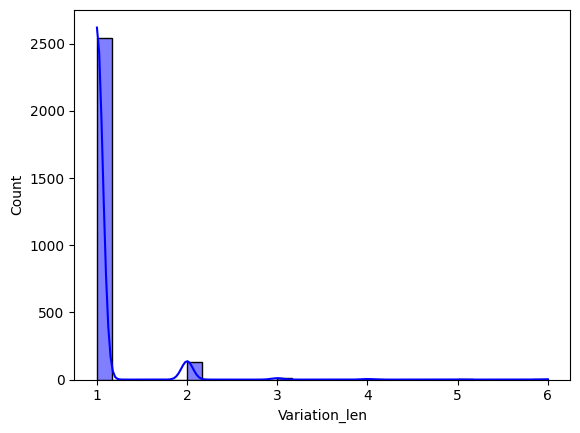

In [317]:
sns.histplot(df_med['Variation_len'], kde=True,
             bins=30, color = 'blue')

In [318]:
# filter by variation length equal to 1
df_med = df_med[df_med['Variation_len'] == 1]

In [319]:
# merge the datasets
df = pd.merge(df_med, df_text, on='ID')

In [320]:
df.head(5)

,ID,Gene,Variation,Class,Gene_len,Variation_len,Text,word_count
0,1,CBL,W802*,2,1,1,report earlier ccbl mutat small cohort taiwane...,5756
1,2,CBL,Q249E,2,1,1,report earlier ccbl mutat small cohort taiwane...,5756
2,3,CBL,N454D,3,1,1,y371h mutat stop codon opposit allel strongli ...,5572
3,4,CBL,L399V,4,1,1,andor cble2 bind give select advantag tumor ce...,6202
4,5,CBL,V391I,4,1,1,andor cble2 bind give select advantag tumor ce...,6202


In [321]:
df.columns

Index(['ID', 'Gene', 'Variation', 'Class', 'Gene_len', 'Variation_len', 'Text',
       'word_count'],
      dtype='object')

In [322]:
df.dtypes

ID                int64
Gene             object
Variation        object
Class             int64
Gene_len          int64
Variation_len     int64
Text             object
word_count        int64
dtype: object

<Axes: ylabel='Class'>

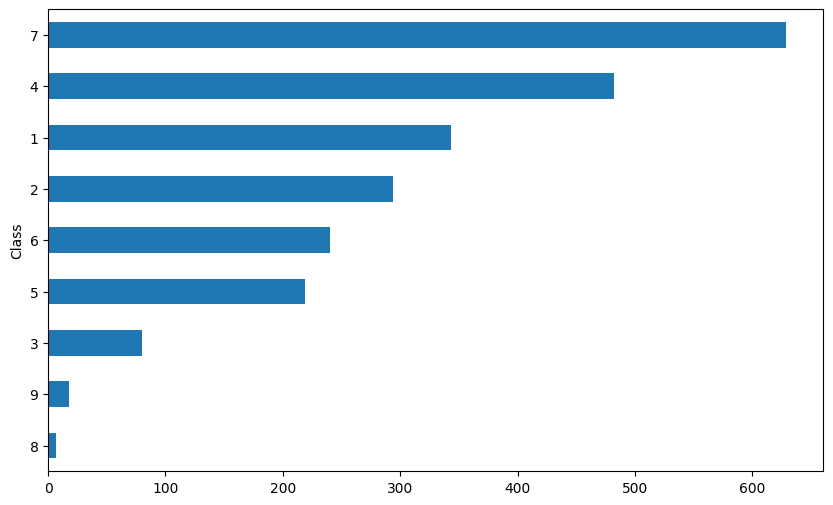

In [323]:
df['Class'].value_counts().sort_values().plot(kind='barh',figsize=(10,6))

In [324]:
df['word_count'] = df['word_count'].astype(str)  

In [325]:
#!pip install imbalanced-learn

In [326]:
# tf-idf vectorization to convert text to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000, lowercase=True, analyzer='word', ngram_range=(1,4))
X = tfidf.fit_transform(df[['Text', 'Gene', 'Variation','word_count']].apply(lambda x: ' '.join(x), axis=1)).toarray()
# target variable is the class
y = df['Class'].values
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
# train the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=30, random_state=42)
# svc 
#from sklearn.svm import SVC
#classifier = SVC(kernel='rbf', random_state=42, C=10, gamma=0.2)
# use Decision Tree
classifier.fit(X_train, y_train)
# make predictions
y_pred = classifier.predict(X_test)
# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[37  1  0 18  8  1 10  0]
 [ 2 31  0  4  2  3 24  0]
 [ 1  0  7  1  0  0  3  0]
 [16  0  2 56  3  1  8  0]
 [ 9  0  2  5 15  6  9  0]
 [ 9  1  1  1  1 34  6  0]
 [ 1 10  4  1  6  0 98  0]
 [ 0  0  0  0  1  0  2  2]]
              precision    recall  f1-score   support

           1       0.49      0.49      0.49        75
           2       0.72      0.47      0.57        66
           3       0.44      0.58      0.50        12
           4       0.65      0.65      0.65        86
           5       0.42      0.33      0.37        46
           6       0.76      0.64      0.69        53
           7       0.61      0.82      0.70       120
           9       1.00      0.40      0.57         5

    accuracy                           0.60       463
   macro avg       0.64      0.55      0.57       463
weighted avg       0.61      0.60      0.60       463

0.6047516198704104


In [327]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Count vectorization to convert text to numerical data
count_vectorizer = CountVectorizer(max_features=2000, lowercase=True, analyzer='word', ngram_range=(1, 3))
X = count_vectorizer.fit_transform(df[['Text', 'Gene', 'Variation']].apply(lambda x: ' '.join(x), axis=1)).toarray()

# target variable is the class
y = df['Class'].values

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# train the model
classifier = RandomForestClassifier(n_estimators=40, random_state=42)
classifier.fit(X_train, y_train)

# make predictions
y_pred = classifier.predict(X_test)

# evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix)
print(class_report)
print(f'Accuracy: {accuracy}')

[[38  0  0 18  6  0 13  0]
 [ 1 30  0  3  2  3 27  0]
 [ 0  0  7  2  0  0  3  0]
 [14  0  2 60  2  1  7  0]
 [11  0  1  7 12  6  9  0]
 [ 9  1  1  1  1 34  6  0]
 [ 1  8  8  2  6  0 95  0]
 [ 0  0  0  0  1  0  2  2]]
              precision    recall  f1-score   support

           1       0.51      0.51      0.51        75
           2       0.77      0.45      0.57        66
           3       0.37      0.58      0.45        12
           4       0.65      0.70      0.67        86
           5       0.40      0.26      0.32        46
           6       0.77      0.64      0.70        53
           7       0.59      0.79      0.67       120
           9       1.00      0.40      0.57         5

    accuracy                           0.60       463
   macro avg       0.63      0.54      0.56       463
weighted avg       0.61      0.60      0.59       463

Accuracy: 0.6004319654427646


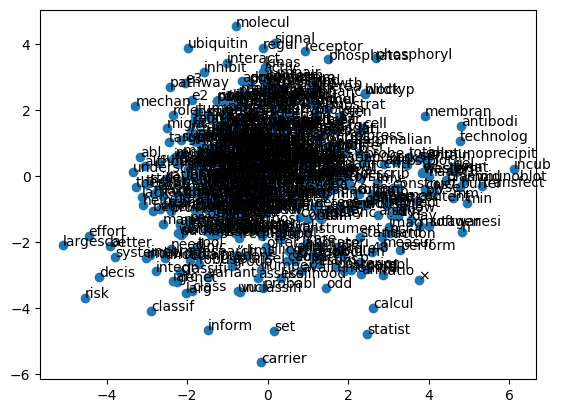

In [328]:
# now, help me implement word2vec
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [text.split() for text in df['Text']]
# train model
model = Word2Vec(sentences, min_count=100)
# fit a 2d PCA model to the vectors
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


In [329]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# define training data
sentences = [text.split() for text in df[['Text', 'Gene', 'Variation']].apply(lambda x: ' '.join(x), axis=1)]

# train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=150, window=5, min_count=10, workers=4, seed=42)

# create feature vectors for each text
def get_feature_vector(text, model):
    words = text.split()
    feature_vector = np.mean([model.wv[word] for word in words if word in model.wv], axis=0)
    # add to feature vector the number of words in the text
#    feature_vector = np.append(feature_vector, len(words))
    # add to feature vector the standard deviation of the word vectors
    feature_vector = np.append(feature_vector, np.std([model.wv[word] for word in words if word in model.wv]))

    return feature_vector

X = np.array([get_feature_vector(text, word2vec_model) for text in df[['Text', 'Gene', 'Variation']].apply(lambda x: ' '.join(x), axis=1)])
y = df['Class'].values

# handle any NaN values that may result from empty texts
X = np.nan_to_num(X)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# train the model
#classifier = RandomForestClassifier(n_estimators=70, random_state=42)
# xgboost
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators=20, random_state=42, 
                           max_depth=25, learning_rate=0.05,
                           subsample=0.5, colsample_bytree=0.5)
# logistic regression
classifier.fit(X_train, y_train)

# make predictions
y_pred_train = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred_train))

[[36  1  0 23  5  2  8  0  0]
 [ 4 29  0  2  3  3 25  0  0]
 [ 2  0  4  3  0  0  3  0  0]
 [16  0  0 62  3  0  5  0  0]
 [11  0  2  4 14  5 10  0  0]
 [ 8  2  1  2  1 33  6  0  0]
 [ 3 13  0  7  4  0 93  0  0]
 [ 0  0  0  1  1  0  1  0  2]
 [ 0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.45      0.48      0.46        75
           1       0.64      0.44      0.52        66
           2       0.57      0.33      0.42        12
           3       0.60      0.72      0.65        86
           4       0.45      0.30      0.36        46
           5       0.77      0.62      0.69        53
           6       0.62      0.78      0.69       120
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         0

    accuracy                           0.59       463
   macro avg       0.46      0.41      0.42       463
weighted avg       0.58      0.59      0.57       463

0.5853131749460043
0.787

/home/wagner/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/wagner/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/wagner/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/wagner/.local/lib/python